In [3]:
# %load /home/dan/.jupyter/firstcell.py
%load_ext autoreload
%autoreload 2

import sys
import os
import time
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

font = {'size'   : 14}
mpl.rc('font', **font)

import numpy as np
import pandas as pd

import scipy
from scipy import stats

import sklearn
import sklearn.cluster
import sklearn.datasets

import phate
import scprep
import magic
import meld
import graphtools as gt

import scanpy as sc
import anndata

from joblib import Parallel, delayed



In [4]:
data, label =  sklearn.datasets.load_boston(return_X_y=True)

In [12]:
data_bunch =  sklearn.datasets.load_boston(return_X_y=False)

In [15]:
data_bunch

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [13]:
data = pd.DataFrame(data_bunch['data'], columns=data_bunch['feature_names'])

In [16]:
data["value"] = data_bunch.target

<AxesSubplot:xlabel='DIS', ylabel='value'>

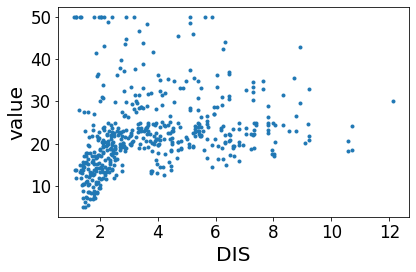

In [26]:
scprep.plot.scatter2d(data[['DIS', 'value']])

In [29]:
z = np.polyfit(data['DIS'], data['value'], deg=1)

In [30]:
p = np.poly1d(z)

In [32]:
data = pd.read_csv('./2424674.csv')

In [39]:
data_mean = data.groupby('DATE').mean()

In [40]:
data_mean.columns

Index(['DLY-DUTR-NORMAL', 'DLY-DUTR-STDDEV', 'DLY-TAVG-NORMAL',
       'DLY-TAVG-STDDEV', 'DLY-TMAX-NORMAL', 'DLY-TMAX-STDDEV',
       'DLY-TMIN-NORMAL', 'DLY-TMIN-STDDEV'],
      dtype='object')

In [54]:
data_mean.index.shape

(366,)

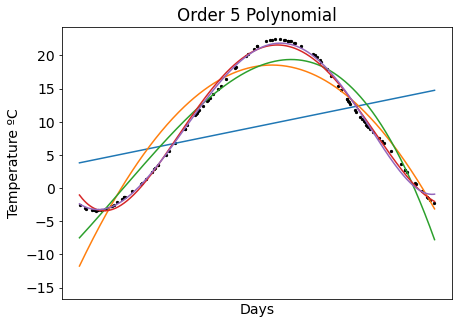

In [69]:
fig, ax = plt.subplots(1, figsize=(7,5))
x = np.arange(data_mean.shape[0])
y = data_mean["DLY-TAVG-NORMAL"]

idx = np.sort(np.random.choice(y.shape[0], int(y.shape[0] * 0.30)))
x = x[idx]
y = y[idx]


ax.scatter(x,y, c='k', s=5)
ax.set_xticks([])
ax.set_ylabel('Temperature ºC')
ax.set_xlabel('Days')
ax.set_ylim((-16.682938310145996, 24.292976358454162))
fig.savefig('./temperature_fit.raw.png', dpi=150)

for deg in [1,2,3,4,5]:
    z = np.polyfit(x, y, deg=deg)
    p = np.poly1d(z)
    xp = np.arange(data_mean.shape[0])
    
    ax.plot(xp, p(xp))
    
    ax.set_title('Order {} Polynomial'.format(deg))
    fig.savefig('./temperature_fit.{}.png'.format(deg), dpi=150)


In [70]:
np.polyfit(x, y, deg=1)

array([0.02995672, 3.81415203])